## **Deliruim Data Cohort from MIMIC-IV-3.2 **
Data Downloaded February 8th , 2025

Phase 1 Data Extraction
https://colab.research.google.com/drive/1IIYkR_CSGwakQJ5g47gtY1TnQIs91T02#scrollTo=71f2964d-361e-4a8a-b59f-429624b6e1ce

# Phase 2 Extracted Dataset Mounted  
Nth Attempt Feb 22, 24



In [1]:
 
 

# Define file path
file_path = "D:/MIMIC-IV-Data-Pipeline/processed_data/delirium_prediction_data_v3.csv.gz"

# Check if the file exists
import os
print("File Exists:", os.path.exists(file_path))


File Exists: True


In [3]:
import pandas as pd

file_path = "D:/MIMIC-IV-Data-Pipeline/processed_data/delirium_prediction_data_v3.csv.gz"

# Load dataset
df = pd.read_csv(file_path, compression="gzip", low_memory=False)

print("✅ Data Loaded! Shape:", df.shape)
print(df.head())  # Show first 5 rows


✅ Data Loaded! Shape: (555244, 20)
   subject_id   hadm_id  admission_type      admission_location  \
0    10000032  22595853          URGENT  TRANSFER FROM HOSPITAL   
1    10000032  22841357        EW EMER.          EMERGENCY ROOM   
2    10000032  25742920        EW EMER.          EMERGENCY ROOM   
3    10000032  29079034        EW EMER.          EMERGENCY ROOM   
4    10000068  25022803  EU OBSERVATION          EMERGENCY ROOM   

  discharge_location insurance marital_status   race  ed_time_spent gender  \
0               HOME  Medicaid        WIDOWED  WHITE          253.0      F   
1               HOME  Medicaid        WIDOWED  WHITE          337.0      F   
2            HOSPICE  Medicaid        WIDOWED  WHITE          286.0      F   
3               HOME  Medicaid        WIDOWED  WHITE          486.0      F   
4                NaN       NaN         SINGLE  WHITE          511.0      F   

   anchor_age  anchor_year     stay_id                       last_careunit  \
0          52  

In [5]:
print("🔍 Dataset Overview:")
print(df.info())  # Check column types and memory usage
print("\nMissing Values:\n", df.isnull().sum())  # Count missing values


🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555244 entries, 0 to 555243
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            555244 non-null  int64  
 1   hadm_id               555244 non-null  int64  
 2   admission_type        555244 non-null  object 
 3   admission_location    555243 non-null  object 
 4   discharge_location    405420 non-null  object 
 5   insurance             545797 non-null  object 
 6   marital_status        540815 non-null  object 
 7   race                  555244 non-null  object 
 8   ed_time_spent         385225 non-null  float64
 9   gender                555244 non-null  object 
 10  anchor_age            555244 non-null  int64  
 11  anchor_year           555244 non-null  int64  
 12  stay_id               94458 non-null   float64
 13  last_careunit         94458 non-null   object 
 14  los                   94444 non-

In [7]:
print("🔍 Delirium Class Distribution:")
print(df["delirium"].value_counts(normalize=True))  # % of cases with vs. without delirium


🔍 Delirium Class Distribution:
delirium
0.0    0.980794
1.0    0.019206
Name: proportion, dtype: float64


In [9]:
# prompt: rename los to icu _os

df = df.rename(columns={'los': 'icu_los'})


 Feature Category	Column Name
🔹 Identifiers	subject_id
	hadm_id
	stay_id
🔹 Patient Demographics	gender
	anchor_age
	anchor_year
	race
	marital_status
🔹 Admission & Hospitalization Details	admission_type
	admission_location
	discharge_location
	insurance
	ed_time_spent
🔹 ICU Stay Details	last_careunit
	los_icu
🔹 Diagnoses & Comorbidities	num_comorbidities
	diagnosis_list
	palliative_care_flag
🔹 Delirium Outcome	delirium
🔹 Medication Exposure	high_risk_med


✅ Insights from Dataset Overview
Your dataset now has 555,244 rows (one per admission), but some columns have missing values. Below are the key observations:

🔍 Key Observations
Missing ICU Stay Information:

stay_id, last_careunit, and los are missing in ~460,000 rows.
This suggests that many admissions were NOT ICU stays.
Missing Emergency Department (ED) Time:

ed_time_spent is missing for ~170,000 admissions.
Likely because not all patients enter via ED.
Palliative & Delirium Flags Have Small Missingness:

531 missing values in:
diagnosis_list
num_comorbidities
palliative_care_flag
delirium
These could be from admissions without recorded diagnoses.
High-Risk Medications Have Missing Values:

~82,720 rows are missing high_risk_med.
This likely means that some patients had no prescriptions.


In [11]:
# Count occurrences of each patient (subject_id)
patient_counts = df["subject_id"].value_counts()

# Display summary
print("🔍 Number of Unique Patients:", df["subject_id"].nunique())
print("🔍 Total Rows in Dataset:", df.shape[0])
print("🔍 Distribution of Patient Admissions:")
print(patient_counts.describe())  # Summary statistics for occurrences


🔍 Number of Unique Patients: 223452
🔍 Total Rows in Dataset: 555244
🔍 Distribution of Patient Admissions:
count    223452.000000
mean          2.484847
std           3.622969
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         238.000000
Name: count, dtype: float64


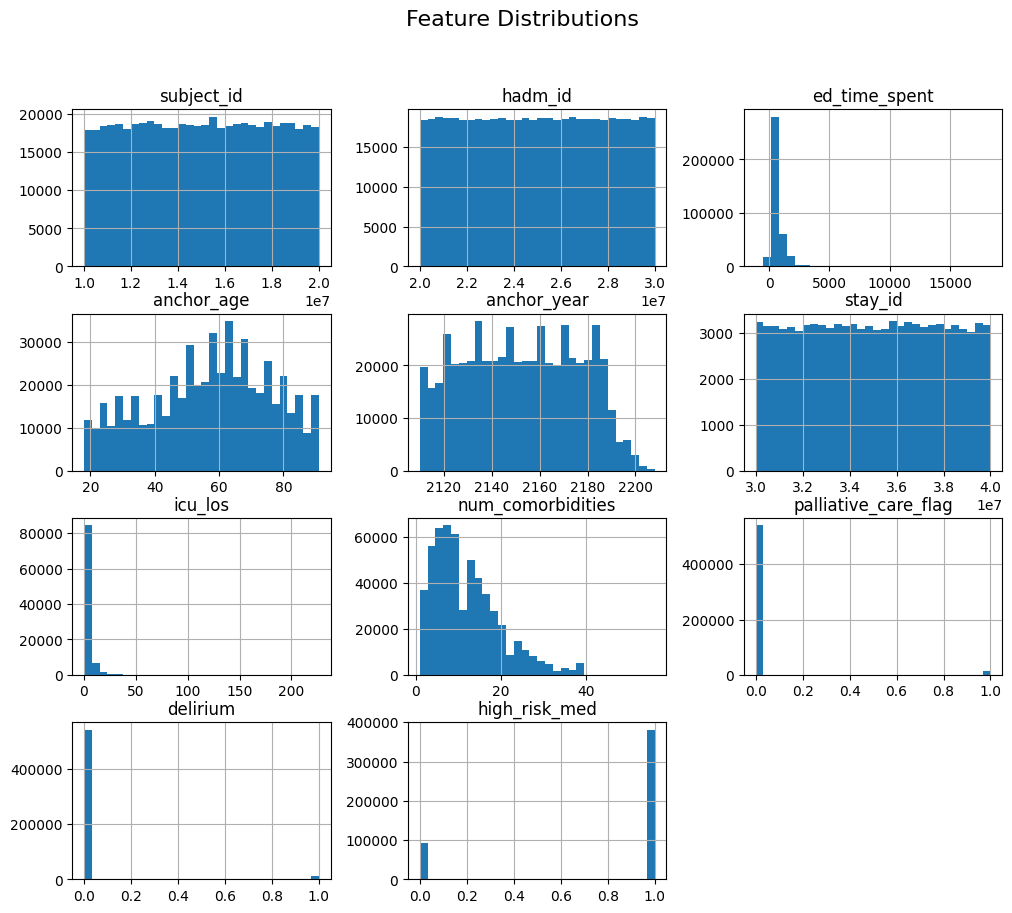

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


✅ Next Steps: Handling Missing Data



In [13]:
#1️⃣ Fill or Remove Missing diagnosis_list Entries

# Since diagnoses drive delirium and palliative_care_flag, replace missing lists with an empty list:

df["diagnosis_list"] = df["diagnosis_list"].apply(lambda x: x if isinstance(x, list) else [])

# 2️⃣ Fill palliative_care_flag and delirium with 0
#If a patient has no diagnosis data, assume 0 for both:
df["palliative_care_flag"] = df["palliative_care_flag"].fillna(0).astype(int)
df["delirium"] = df["delirium"].fillna(0).astype(int)

# 3️⃣ Fill high_risk_med with 0
# Missing values likely mean no high-risk medications were prescribed.

df["high_risk_med"] = df["high_risk_med"].fillna(0).astype(int)


In [15]:
#4️⃣ Handle Missing ICU Data (stay_id, last_careunit, los)
#Since not all patients were in the ICU, replace missing values with "Not ICU" or 0:
df["stay_id"] = df["stay_id"].fillna("Not ICU")
df["last_careunit"] = df["last_careunit"].fillna("Not ICU")
# This didnt work #df["los_icu"] = df["los_icu"].fillna(0)


In [17]:
# 5️⃣ Handle Missing ed_time_spent
#Patients missing ed_time_spent likely didn’t enter via the ED.
#Fill missing values with 0:
df["ed_time_spent"] = df["ed_time_spent"].fillna(0)

In [19]:
print("🔍 Dataset Overview:")
print(df.info())  # Check column types and memory usage
print("\nMissing Values:\n", df.isnull().sum())  # Count missing values

🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555244 entries, 0 to 555243
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            555244 non-null  int64  
 1   hadm_id               555244 non-null  int64  
 2   admission_type        555244 non-null  object 
 3   admission_location    555243 non-null  object 
 4   discharge_location    405420 non-null  object 
 5   insurance             545797 non-null  object 
 6   marital_status        540815 non-null  object 
 7   race                  555244 non-null  object 
 8   ed_time_spent         555244 non-null  float64
 9   gender                555244 non-null  object 
 10  anchor_age            555244 non-null  int64  
 11  anchor_year           555244 non-null  int64  
 12  stay_id               555244 non-null  object 
 13  last_careunit         555244 non-null  object 
 14  icu_los               94444 non-

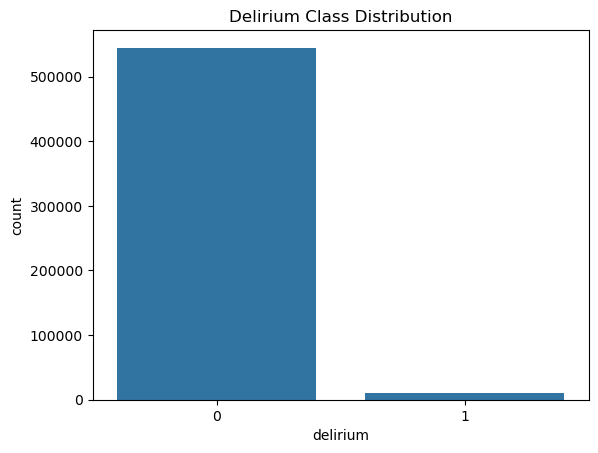

delirium
0    0.980812
1    0.019188
Name: proportion, dtype: float64


In [25]:
# EDA Part 2

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="delirium", data=df)
plt.title("Delirium Class Distribution")
plt.show()
print(df["delirium"].value_counts(normalize=True))  # Class balance check


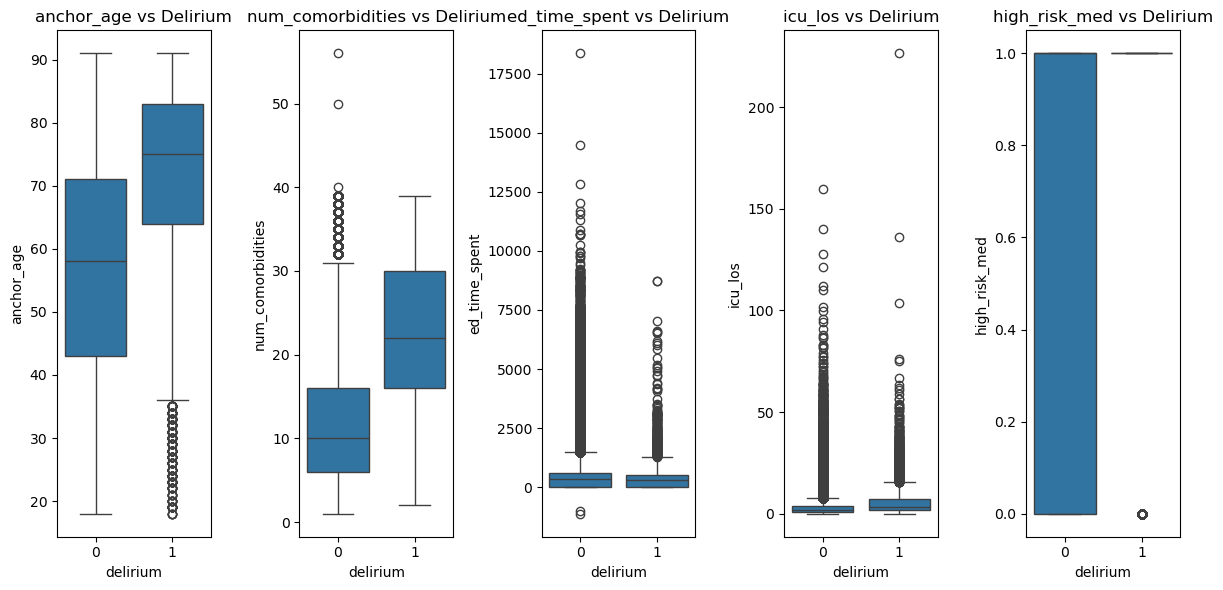

In [29]:
# Explore Key Features by Delirium Status
features = ["anchor_age", "num_comorbidities", "ed_time_spent", "icu_los","high_risk_med"]
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(x="delirium", y=feature, data=df)
    plt.title(f"{feature} vs Delirium")

plt.tight_layout()
plt.show()

In [31]:
#Step 1 : Feature Engineering
#1️⃣ Encode Categorical Variables
categorical_cols = ["admission_type", "admission_location", "discharge_location", "insurance", "race", "gender", "marital_status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#Why? One-hot encoding allows models to use categorical variables in numerical format.
#2️⃣ Handle Missing Values in Numerical Columns
df["icu_los"] = df["icu_los"].fillna(0)  # Fill missing ICU LOS with 0 (non-ICU admissions)
df["num_comorbidities"] = df["num_comorbidities"].fillna(0)
#Why? Keeps numerical data clean for modeling.

#3️⃣ Drop Unnecessary Identifiers
df = df.drop(columns=["subject_id", "hadm_id", "stay_id", "anchor_year"])
#Why? These IDs don't contribute to prediction.  Not considering repeated patient admissions as each admission should be treated seprately?

In [33]:
# Identify categorical columns that may still contain text
categorical_cols = ["last_careunit"]

# Convert categorical columns to numerical encoding
df[categorical_cols] = df[categorical_cols].astype("category").apply(lambda x: x.cat.codes)

print("✅ Categorical variables converted to numeric!")


✅ Categorical variables converted to numeric!


In [35]:
# Drop non-numeric columns before applying SMOTE

df = df.drop(columns=["diagnosis_list"])

print("✅ Removed non-numeric columns before SMOTE.")


✅ Removed non-numeric columns before SMOTE.


In [37]:
#🔹 Step 2: Train-Test Split with SMOTE
#1️⃣ Define Features (X) and Target (y)

# Define target variable
y = df["delirium"]

# Drop target column from features
X = df.drop(columns=["delirium"])
#2️⃣ Split Data into Training & Testing Sets

from sklearn.model_selection import train_test_split

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-test split completed!")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")
# Why? Stratifying ensures the same delirium proportion in both train and test sets.


✅ Train-test split completed!
Training Set: (444195, 77), Test Set: (111049, 77)


In [41]:
#3️⃣ Apply SMOTE to Handle Class Imbalance

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

In [43]:
# Apply SMOTE only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied! New class distribution:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))
#Why? Ensures balanced training data while keeping test data unchanged for fair evaluation.

✅ SMOTE applied! New class distribution:
delirium
0    0.5
1    0.5
Name: proportion, dtype: float64


1️⃣ Feature Scaling (Standardization or Normalization)
Machine learning models, especially Logistic Regression, SVM, and Neural Networks, benefit from feature scaling.

Option 1: Standardization (Recommended for Most Models)
Scales numerical features to have mean = 0 and standard deviation = 1.

In [45]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numeric_cols = ["anchor_age", "num_comorbidities", "ed_time_spent", "icu_los"]

# Apply standardization
scaler = StandardScaler()
X_train_resampled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Features standardized!")


✅ Features standardized!


In [47]:
print("✅ Final Data Check:")
print(f"Training Set Shape: {X_train_resampled.shape}, {y_train_resampled.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")


✅ Final Data Check:
Training Set Shape: (871344, 77), (871344,)
Test Set Shape: (111049, 77), (111049,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
print("✅ Model Performance:")
print(classification_report(y_test, y_pred))


✅ Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    108918
           1       0.16      0.16      0.16      2131

    accuracy                           0.97    111049
   macro avg       0.57      0.57      0.57    111049
weighted avg       0.97      0.97      0.97    111049



In [51]:
log_model = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

🔹 Next Steps to Improve Performance
1️⃣ Increase max_iter to allow convergence

python
Copy
Edit
log_model = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)
2️⃣ Ensure Feature Scaling



In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
print("✅ Model Performance:")
print(classification_report(y_test, y_pred))


✅ Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    108918
           1       0.16      0.16      0.16      2131

    accuracy                           0.97    111049
   macro avg       0.57      0.57      0.57    111049
weighted avg       0.97      0.97      0.97    111049

